### Part A

Importing Libaries & loading data 

In [30]:
# HERE YOU WILL WRITE CODE TO TEST A NUMBER OF PREDICTORS
# AND FINALLY CHOOSE AND TRAIN THE PREDICTOR THAT YOU WILL BE USING FOR PART B
import pandas as pd
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

train_df = pd.read_csv("CE802_P3_Data.csv")
train_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F28,F29,F30,F31,F32,F33,F34,F35,F36,Target
0,-25.08,129.58,31.30,12.00,7.56,-88.80,-1811.64,16834.44,-1402.42,2016.42,...,-706.41,Low,-21138.90,-60.18,UK,-9094.92,60.99,-79.10,-140.95,331.17
1,-28.14,115.72,33.98,1.41,12.35,-76.28,-1641.91,11592.00,-1417.38,-3699.15,...,1414.05,Very high,-16681.14,-33.48,USA,-13284.10,55.47,-120.86,-158.57,659.81
2,-27.48,62.54,27.40,4.29,8.98,-116.06,-2288.37,19803.33,-1261.72,-3151.60,...,612.69,Medium,-4749.60,128.08,UK,-12784.39,56.73,-67.20,-165.59,933.24
3,-23.40,69.24,18.52,-0.57,17.24,-81.36,-1602.93,21335.70,-252.64,-4038.01,...,-700.44,High,-27214.56,-101.84,Rest,-12678.65,71.28,-70.42,-213.46,118.43
4,-31.92,-194.34,22.66,12.18,14.12,-78.24,-2251.44,48551.61,-1770.48,1204.17,...,358.20,Low,-22507.92,-11.64,UK,-16637.84,58.89,-108.60,-231.66,870.91


## Checking data Types

In [2]:
train_df.dtypes

F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16       float64
F17       float64
F18       float64
F19       float64
F20       float64
F21       float64
F22       float64
F23         int64
F24       float64
F25       float64
F26       float64
F27         int64
F28       float64
F29        object
F30       float64
F31       float64
F32        object
F33       float64
F34       float64
F35       float64
F36       float64
Target    float64
dtype: object

## Checking data shape

In [3]:
train_df.shape

(1500, 37)

## Null Data Percentage 

In [4]:
train_df.isnull().mean()

F1        0.0
F2        0.0
F3        0.0
F4        0.0
F5        0.0
F6        0.0
F7        0.0
F8        0.0
F9        0.0
F10       0.0
F11       0.0
F12       0.0
F13       0.0
F14       0.0
F15       0.0
F16       0.0
F17       0.0
F18       0.0
F19       0.0
F20       0.0
F21       0.0
F22       0.0
F23       0.0
F24       0.0
F25       0.0
F26       0.0
F27       0.0
F28       0.0
F29       0.0
F30       0.0
F31       0.0
F32       0.0
F33       0.0
F34       0.0
F35       0.0
F36       0.0
Target    0.0
dtype: float64

## Preprocessing

F29 column have ordial relation so changing values in order. F32 has no ordial relation, so applying one hot encoding

In [5]:
filtered_df = pd.get_dummies(train_df, columns= [ 'F32'])
filtered_df['F29'].replace({'Very low':1,'Low':2, 'Medium':3, 'High':4, 'Very high':5}, inplace=True)
filtered_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F31,F33,F34,F35,F36,Target,F32_Europe,F32_Rest,F32_UK,F32_USA
0,-25.08,129.58,31.30,12.00,7.56,-88.80,-1811.64,16834.44,-1402.42,2016.42,...,-60.18,-9094.92,60.99,-79.10,-140.95,331.17,0,0,1,0
1,-28.14,115.72,33.98,1.41,12.35,-76.28,-1641.91,11592.00,-1417.38,-3699.15,...,-33.48,-13284.10,55.47,-120.86,-158.57,659.81,0,0,0,1
2,-27.48,62.54,27.40,4.29,8.98,-116.06,-2288.37,19803.33,-1261.72,-3151.60,...,128.08,-12784.39,56.73,-67.20,-165.59,933.24,0,0,1,0
3,-23.40,69.24,18.52,-0.57,17.24,-81.36,-1602.93,21335.70,-252.64,-4038.01,...,-101.84,-12678.65,71.28,-70.42,-213.46,118.43,0,1,0,0
4,-31.92,-194.34,22.66,12.18,14.12,-78.24,-2251.44,48551.61,-1770.48,1204.17,...,-11.64,-16637.84,58.89,-108.60,-231.66,870.91,0,0,1,0


Spliting feature and target data

In [6]:
X = filtered_df.loc[:, filtered_df.columns != 'Target']
Y = filtered_df.Target
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F30,F31,F33,F34,F35,F36,F32_Europe,F32_Rest,F32_UK,F32_USA
0,-25.08,129.58,31.30,12.00,7.56,-88.80,-1811.64,16834.44,-1402.42,2016.42,...,-21138.90,-60.18,-9094.92,60.99,-79.10,-140.95,0,0,1,0
1,-28.14,115.72,33.98,1.41,12.35,-76.28,-1641.91,11592.00,-1417.38,-3699.15,...,-16681.14,-33.48,-13284.10,55.47,-120.86,-158.57,0,0,0,1
2,-27.48,62.54,27.40,4.29,8.98,-116.06,-2288.37,19803.33,-1261.72,-3151.60,...,-4749.60,128.08,-12784.39,56.73,-67.20,-165.59,0,0,1,0
3,-23.40,69.24,18.52,-0.57,17.24,-81.36,-1602.93,21335.70,-252.64,-4038.01,...,-27214.56,-101.84,-12678.65,71.28,-70.42,-213.46,0,1,0,0
4,-31.92,-194.34,22.66,12.18,14.12,-78.24,-2251.44,48551.61,-1770.48,1204.17,...,-22507.92,-11.64,-16637.84,58.89,-108.60,-231.66,0,0,1,0


Visualising data to see the paterns

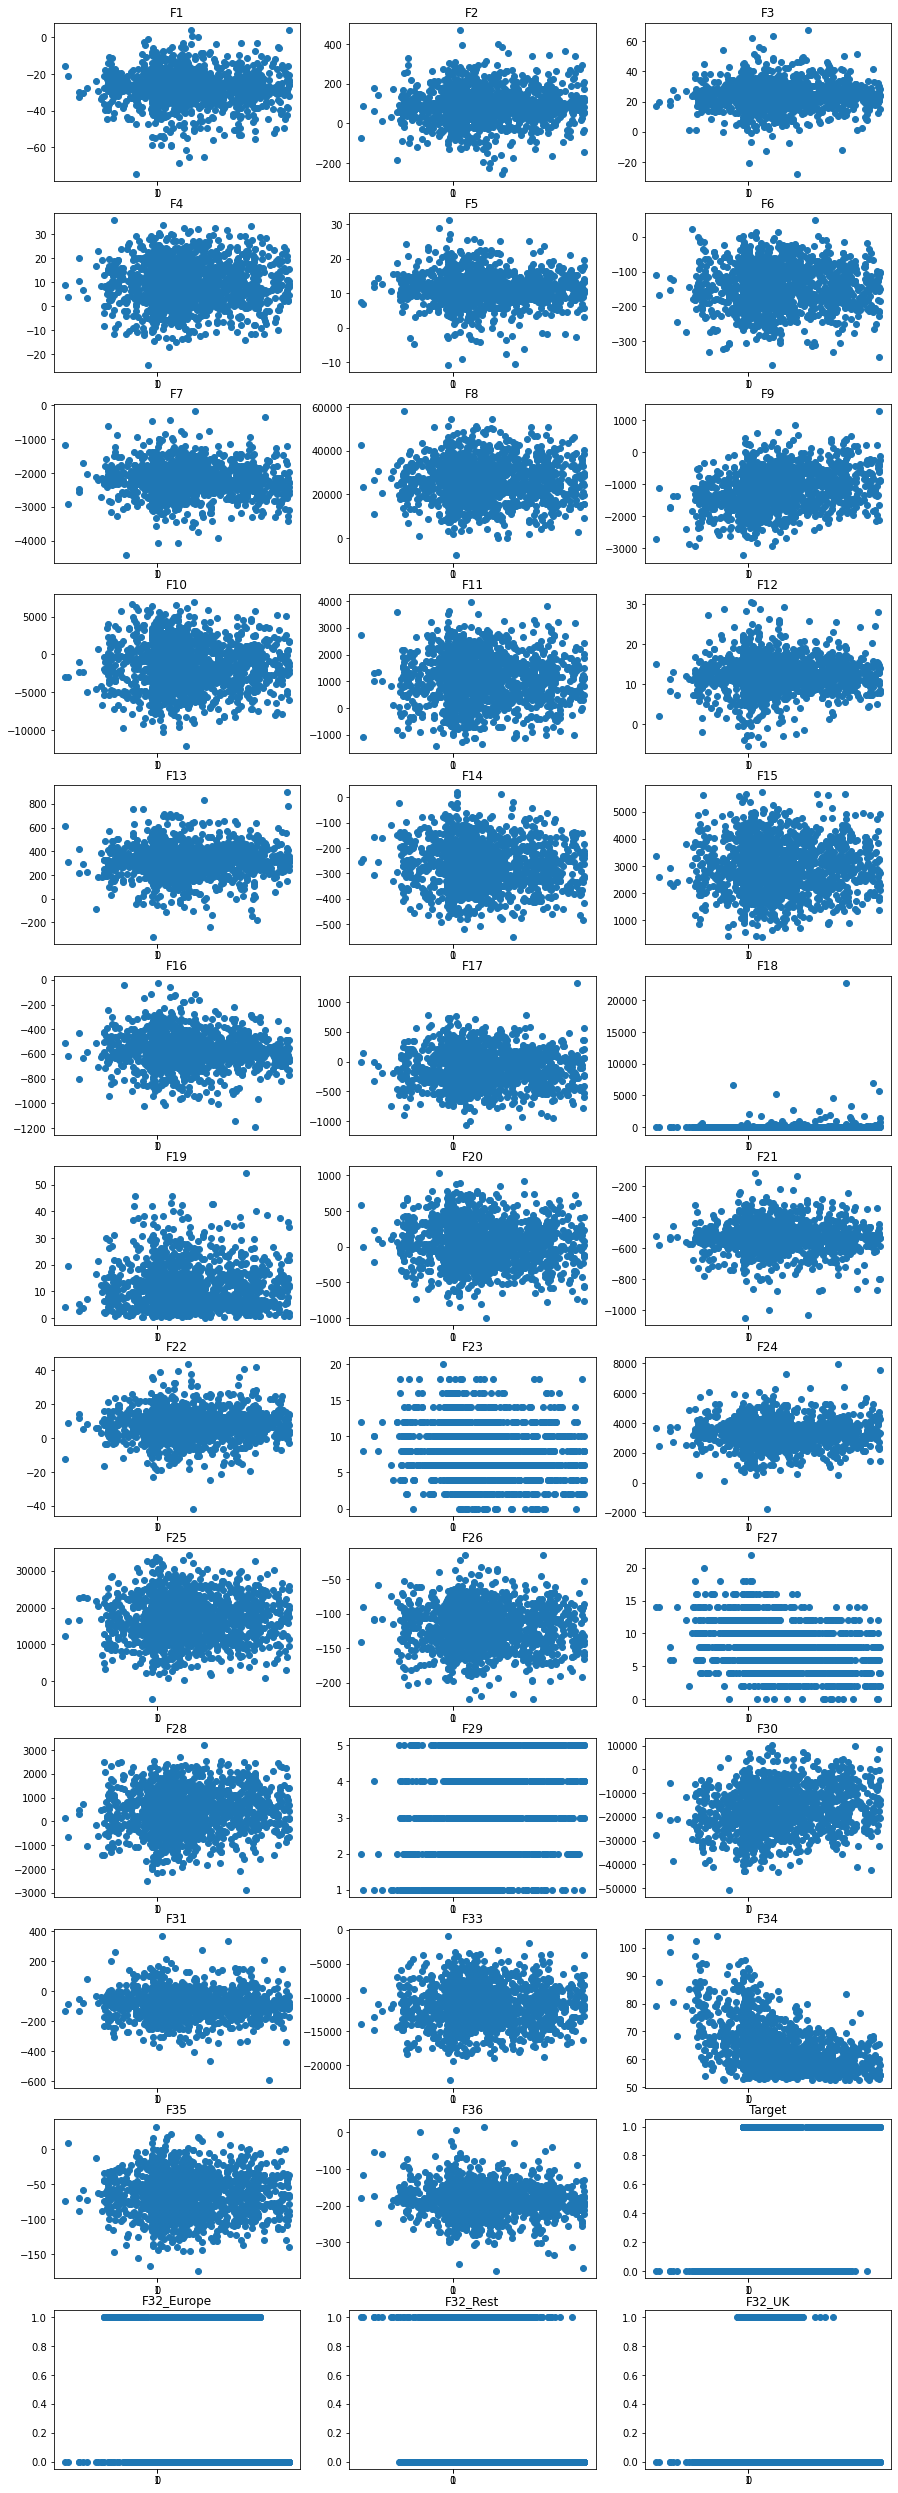

In [22]:
x = X.to_numpy()
y = Y.to_numpy()
plt.figure(figsize=(15, 35))
for i in range(x.shape[1]):
    plt.subplot(13, 3, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(filtered_df.columns[i])

Spliting data 80:20 for test & training

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

## GridSearchCV of  all the Regressors

In [47]:
# logistic Regression
params = {}
reg = LinearRegression()
linearCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# MLP NN
params = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 100],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
reg = MLPRegressor()
mlpCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Decison Tree
from sklearn.tree import DecisionTreeRegressor
params = {'max_depth': list(range(1,10))}
reg = DecisionTreeRegressor(max_depth=3)
dtCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# define used regressor
reg=RandomForestRegressor(n_estimators=20,
                             criterion='squared_error',
                            )

params = { 'max_depth':list(range(1,10))}
forest = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Lasso Linear Model
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
params = {'alpha':[x / 10.0 for x in range(1, 10)]}
lassoCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

from sklearn import datasets, ensemble

# Gradient Boost
params = {
    "n_estimators": [500,600,700],
    "max_depth": [3,4],
    "min_samples_split": [6,7,8],
    "learning_rate": [0.01,0.02,0.03],
    "loss": ["squared_error"]
}
reg =  ensemble.GradientBoostingRegressor()
grdCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Ada Boost
params = {
    "n_estimators": list(range(100,1000,100))
}
reg =  ensemble.AdaBoostRegressor(random_state=0)
adaCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Array of all classifiers
classifiers = [
    linearCV,
    mlpCV,
    dtCV,
    forest,
    lassoCV,
    grdCV,
    adaCV
    ]

## Pipeline running method

In [45]:
def runPipeline(classifiers, X_train, X_test, y_train, y_test):
    numeric_features = X_train.columns
    numeric_transformer = Pipeline(steps=[
        ('scaler', MinMaxScaler())
    ])

    preprocessor = ColumnTransformer(
       transformers=[
        ('numeric', numeric_transformer, numeric_features)
    ]) 

    for classifier in classifiers:
        pipe = Pipeline(steps=[('preprocessor',preprocessor),
                          ('classifier', classifier)])
        pipe.fit(X_train, y_train)   
        y_pred = pipe.predict(X_test)
        y_pred_train = pipe.predict(X_train)

        print(classifier.estimator)
        print(classifier.best_params_)
        
        print("Train score: %.3f" % pipe.score(X_train, y_train))
        print("Test score: %.3f" % pipe.score(X_test, y_test))
        print("Train RMSE:",mean_squared_error(y_true=y_train,y_pred=y_pred_train,squared=False))
        print("Test RMSE:",mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False))

## Running all the Regressors to find best hyper parameters

In [48]:
runPipeline(classifiers, X_train, X_test, y_train, y_test)

LinearRegression()
{}
Train score: 0.698
Test score: 0.735
Train RMSE: 664.3162735491658
Test RMSE: 655.0125014839412


/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/l

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/l

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/l

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/l

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/l

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anacond

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/l

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed.

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/ex

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  Fi

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  Fi

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anacond

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/py

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/skle

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in 

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  Fi

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/uti

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_net

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  Fi

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/py

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in 

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/ex

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  Fi

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: Ru

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_net

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anacond

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/py

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/py

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed.

  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 96, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 800, in check_array
    _assert_all_finite(array, allow_nan=force_all_finite == "allow-nan")
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 114, in _assert_all_finite
    raise ValueError(
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed.

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/py

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  Fi

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/r

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_base.py:174: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/py

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/rifat/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 706, in score
    return r2_score(y, y_pred, sample_weight=sample_weight)
  F

MLPRegressor()
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'adam'}
Train score: 0.734
Test score: 0.766
Train RMSE: 622.9797805084124
Test RMSE: 615.2621406880818
DecisionTreeRegressor(max_depth=3)
{'max_depth': 6}
Train score: 0.700
Test score: 0.395
Train RMSE: 662.08624488228
Test RMSE: 989.2848076920867
RandomForestRegressor(n_estimators=20)
{'max_depth': 9}
Train score: 0.921
Test score: 0.677
Train RMSE: 340.03660805293003
Test RMSE: 722.970851584242
Lasso(alpha=0.1)
{'alpha': 0.9}
Train score: 0.697
Test score: 0.736
Train RMSE: 665.8032473609197
Test RMSE: 653.464836587318
GradientBoostingRegressor()
{'learning_rate': 0.03, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_split': 7, 'n_estimators': 700}
Train score: 0.972
Test score: 0.872
Train RMSE: 201.87242264868232
Test RMSE: 454.57027690912406
AdaBoostRegressor(random_state=0)
{'n_estimators': 800}
Train score: 0.762
Test score: 0

## Regressors with best parameters

In [51]:
# logistic Regression
params = {}
reg = LinearRegression()
linearCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# MLP NN
params = {
    'hidden_layer_sizes': [(250,125,50,25)],
    'max_iter': [5000],
    'activation': [ 'relu'],
    'solver': [ 'adam'],
    'alpha': [0.1],
    'learning_rate': ['constant'],
}
reg = MLPRegressor()
mlpCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Decison Tree
from sklearn.tree import DecisionTreeRegressor

params = {'max_depth': [3]}
reg = DecisionTreeRegressor(max_depth=3)
dtCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Random Forest
from sklearn.ensemble import RandomForestRegressor

# define used regressor
reg=RandomForestRegressor(n_estimators=20,
                             criterion='squared_error',
                            )

params = { 'max_depth':list(range(1,10))}
forest = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Lasso Linear Model
from sklearn import linear_model
reg = linear_model.Lasso()
params = {'alpha':[0.9]}
lassoCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

from sklearn import datasets, ensemble

# Gradient Boost
params = {
    "n_estimators": [775],
    "max_depth": [3],
    "min_samples_split": [7],
    "learning_rate": [0.03],
    "loss": ["squared_error"]
}
reg =  ensemble.GradientBoostingRegressor()
grdCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)


# Ada Boost
params = {
    "n_estimators": [800]
}

reg =  ensemble.AdaBoostRegressor(random_state=0)
adaCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)

# Array of all classifiers
bestClassifiers = [
    linearCV,
    mlpCV,
    dtCV,
    forest,
    lassoCV,
    grdCV,
    adaCV
    ]

## All the regressor with best outputs

In [52]:
runPipeline(bestClassifiers, X_train, X_test, y_train, y_test)

LinearRegression()
{}
Train score: 0.698
Test score: 0.735
Train RMSE: 664.3162735491658
Test RMSE: 655.0125014839412
MLPRegressor()
{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (250, 125, 50, 25), 'learning_rate': 'constant', 'max_iter': 5000, 'solver': 'adam'}
Train score: 0.788
Test score: 0.807
Train RMSE: 556.3569794609037
Test RMSE: 559.4934235366169
DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}
Train score: 0.401
Test score: 0.342
Train RMSE: 935.9924495642563
Test RMSE: 1031.9661171491412
RandomForestRegressor(n_estimators=20)
{'max_depth': 9}
Train score: 0.925
Test score: 0.686
Train RMSE: 330.12717225072026
Test RMSE: 712.4812299538954
Lasso()
{'alpha': 0.9}
Train score: 0.697
Test score: 0.736
Train RMSE: 665.8032473609197
Test RMSE: 653.464836587318
GradientBoostingRegressor()
{'learning_rate': 0.03, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_split': 7, 'n_estimators': 775}
Train score: 0.975
Test score: 0.873
Train RMSE: 190.51033752742975
T

## Gradient Boosting Regessor with Best Accuracy

In [38]:
numeric_features = X_train.columns
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
]) 

params = {
    "n_estimators": [775],
    "max_depth": [3],
    "min_samples_split": [7],
    "learning_rate": [0.03],
    "loss": ["squared_error"]
}
reg =  ensemble.GradientBoostingRegressor()
grdCV = GridSearchCV(estimator=reg,param_grid=params, cv=10, n_jobs=-1)
pipe = Pipeline(steps=[('preprocessor',preprocessor),
                      ('classifier', grdCV)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print(grdCV.best_params_)
print("Train score: %.3f" % pipe.score(X_train, y_train))
print("Test score: %.3f" % pipe.score(X_test, y_test))
print("Train RMSE:",mean_squared_error(y_true=y_train,y_pred=y_pred_train,squared=False))
print("Test RMSE:",mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False))

{'learning_rate': 0.03, 'loss': 'squared_error', 'max_depth': 3, 'min_samples_split': 7, 'n_estimators': 775}
Train score: 0.975
Test score: 0.873
Train RMSE: 190.51033752742978
Test RMSE: 453.5805614514023


### Part B

In [40]:
# HERE YOU WILL USE THIS TEMPLATE TO SAVE THE PREDICTIONS ON THE TEST SET

# Load the test data
test_df = pd.read_csv('CE802_P3_Test.csv')

# Make sure you work on a copy
test_data = test_df.iloc[:,:-1].copy()

test_data = pd.get_dummies(test_data, columns= [ 'F32'])
test_data['F29'].replace({'Very low':1,'Low':2, 'Medium':3, 'High':4, 'Very high':5}, inplace=True)
predicted = pipe.predict(test_data)
... # CHANGE HERE -- use your previously trained predictor and apply it to test_data
                # (test_data can be modified if needed but make sure you don't change the order of the rows)...

# Replace the last (empty) column with your prediction
test_df.iloc[:,-1] = predicted

# Save to the destination file
test_df.to_csv('CE802_P3_Test_Predictions.csv', index=False, float_format='%.8g')

# IMPORTANT!! Make sure only the last column has changed
assert pd.read_csv('CE802_P3_Test.csv').iloc[:,:-1].equals(pd.read_csv('CE802_P3_Test_Predictions.csv').iloc[:,:-1])